# One-class SVM with non-linear kernel (RBF)

An example using a one-class SVM for novelty detection.
One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

The problem addressed by One Class SVM, as the documentation says, is novelty detection. The original paper describing how to use SVMs for this task is "Support Vector Method for Novelty. Detection".
The idea of novelty detection is to detect rare events, i.e. events that happen rarely, and hence, of which you have very little samples. The problem is then, that the usual way of training a classifier will not work.

So how do you decide what a novel pattern is?. Many approaches are based on the estimation of the density of probability for the data. Novelty corresponds to those samples where the density of probability is "very low". How low depends on the application.

Now, SVMs are max-margin methods, i.e. they do not model a probability distribution. Here the idea is to find a function that is positive for regions with high density of points, and negative for small densities.

The gritty details are given in the paper. ;) If you really intend to go through the paper, make sure that you first understand the settings of the basic SVM algorithm for classification. It will make much easier to understand the bounds and the motivation the algorithm.

The quadratic programming minimization function is slightly different from the original stated above,
but the similarity is still clear:
$$
\begin{array}{c}
\min _{w, \xi_{i}, \rho} \frac{1}{2}\|w\|^{2}+\frac{1}{\nu n} \sum_{i=1}^{n} \xi_{i}-\rho \\
\text { subject to: } \\
\left(w \cdot \phi\left(x_{i}\right)\right) \geq \rho-\xi_{i} \quad \text { for all } i=1, \ldots, n \\
\xi_{i} \geq 0 \quad \text { for all } i=1, \ldots, n
\end{array}
$$

In the previous formulation the parameter $C$ decided the smoothness. In this formula it is the
parameter $\nu$ that characterizes the solution;
1. it sets an upper bound on the fraction of outliers (training examples regarded out-of-class) and,
2. it is a lower bound on the number of training examples used as Support Vector.
Due to the importance of this parameter, this approach is often referred to as $\nu$ -SVM.
Again by using Lagrange techniques and using a kernel function for the dot-product calculations, the
decision function becomes:
$$
f(x)=\operatorname{sgn}\left(\left(w \cdot \phi\left(x_{i}\right)\right)-\rho\right)=\operatorname{sgn}\left(\sum_{i=1}^{n} \alpha_{i} K\left(x, x_{i}\right)-\rho\right)
$$

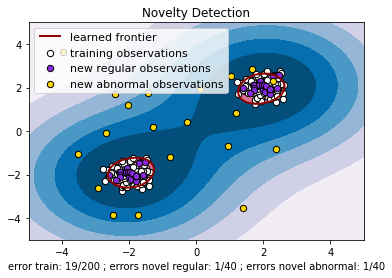

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()